<a href="https://colab.research.google.com/github/crossorbit/hgmldl/blob/main/part6_01_Image_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import sys
sys.path.append("/content/drive/MyDrive/#fastcampus")

In [5]:
os.getcwd()

'/content'

In [6]:
df = pd.read_csv('/content/drive/MyDrive/#fastcampus/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [7]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


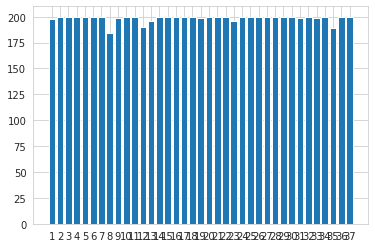

In [8]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

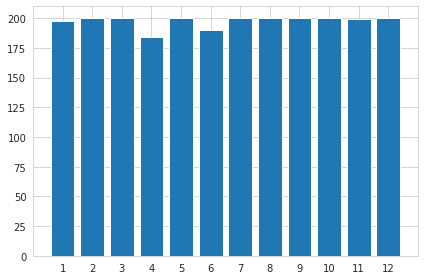

In [9]:
value_counts = df[df['species']==1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

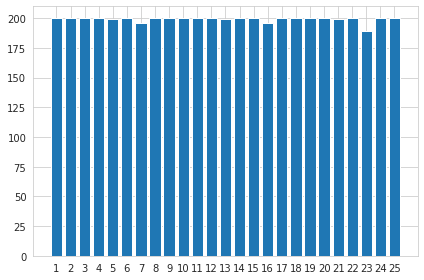

In [10]:
value_counts = df[df['species']==2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [11]:
from glob import glob

In [12]:
image_dir = '/content/drive/MyDrive/#fastcampus/images/'
bbox_dir = '/content/drive/MyDrive/#fastcampus/annotations/xmls/'
seg_dir = '/content/drive/MyDrive/#fastcampus/annotations/trimaps/'

In [13]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [14]:
image_files[:10]

['/content/drive/MyDrive/#fastcampus/images/Bengal_82.jpg',
 '/content/drive/MyDrive/#fastcampus/images/japanese_chin_2.jpg',
 '/content/drive/MyDrive/#fastcampus/images/saint_bernard_82.jpg',
 '/content/drive/MyDrive/#fastcampus/images/Bengal_13.jpg',
 '/content/drive/MyDrive/#fastcampus/images/american_bulldog_48.jpg',
 '/content/drive/MyDrive/#fastcampus/images/german_shorthaired_21.jpg',
 '/content/drive/MyDrive/#fastcampus/images/miniature_pinscher_5.jpg',
 '/content/drive/MyDrive/#fastcampus/images/wheaten_terrier_24.jpg',
 '/content/drive/MyDrive/#fastcampus/images/keeshond_149.jpg',
 '/content/drive/MyDrive/#fastcampus/images/miniature_pinscher_108.jpg']

In [15]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7500

In [16]:
bbox_file = glob(bbox_dir + '*.xml')
len(seg_files)

7500

In [17]:
bbox_file[:10]

['/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_155.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_175.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/newfoundland_138.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_170.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_184.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_128.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/newfoundland_104.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/newfoundland_147.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_174.xml',
 '/content/drive/MyDrive/#fastcampus/annotations/xmls/miniature_pinscher_129.xml']

In [18]:
import cv2
import xml.etree.ElementTree as et # xml 파싱 라이브러리
from matplotlib.patches import Rectangle # 테두리 그려주기 위한 라이브러리

<function matplotlib.pyplot.show>

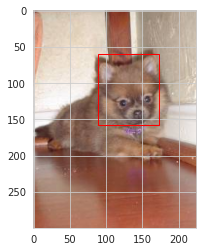

In [19]:
#임의의 파일 경로를 하나 가져오기
image_path = image_files[110]
# image_dir 대신 bbox_dir 로 변경, jpg 대신 xml로 변경
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR 형식으로 읽어온 파일을 RGB 형태로 변환. 주석처리 하면 색이 반전되어 보여짐

# xml 파일 파싱
tree = et.parse(bbox_path)

# object/bndbox 안에 있는 값을 읽어와 실수로 바꿔줌
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin # 좌상단 좌표
rect_y = ymin # 좌상단 좌표
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show

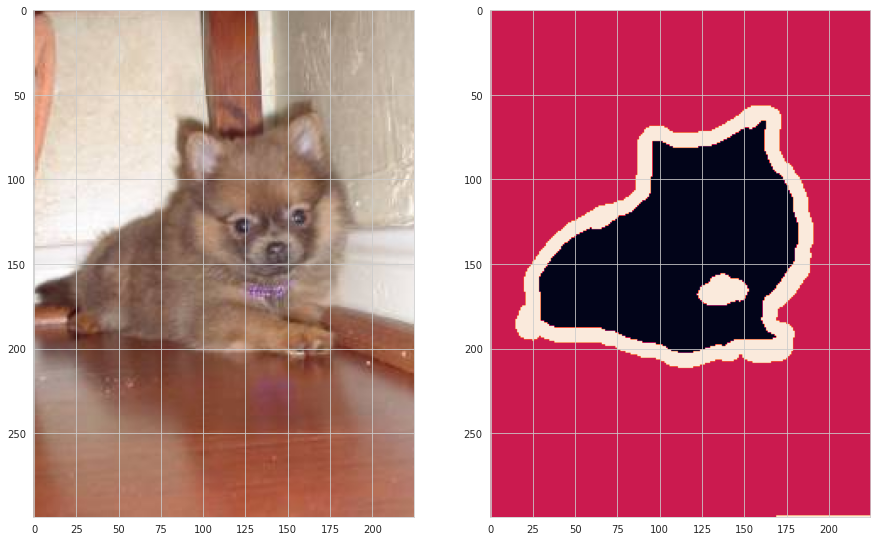

In [20]:
image_path = image_files[110]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

In [21]:
#data 를 k폴드로 구분해보자
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 폴드로 나눴으면, 나중에 불러와 쓸 수 있게 별도 저장하자. df 내 저장
df['fold'] = -1 # -1로 초기화
#kf.split(df)
for idx, (t, v) in enumerate(kf.split(df), 1):
  print(t, len(t), v, len(v))
  df.loc[v, 'fold'] = idx # 각 로우 인덱스를 저장. validation 값을 저장하는게 편리함. 

[   1    2    3 ... 7346 7347 7348] 5879 [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] 5879 [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] 5879 [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] 5879 [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] 5880 [   3    4    5 ... 7334 7338 7348] 1469


In [26]:
df.index
df.columns
print(df['fold'])

0       1
1       4
2       4
3       5
4       5
       ..
7344    2
7345    1
7346    4
7347    3
7348    5
Name: fold, Length: 7349, dtype: int64


In [28]:
print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

1470
5879


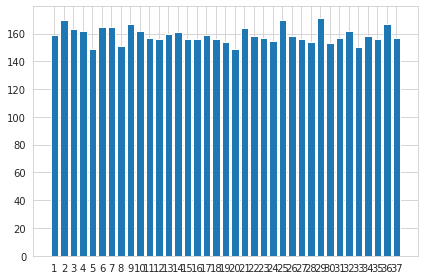

In [31]:
# k폴드 유의점 : 균등하게 섞여있는지 확인(1종 이 빠진 상태로 학습하면 해당 종 결과 안 좋음)
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [34]:
# 최대한 균등하게 k-fold 사용
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
  print(t, len(t), v, len(v))
  df.loc[v, 'fold'] = idx


[   0    1    3 ... 7346 7347 7348] 5879 [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] 5879 [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] 5879 [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] 5879 [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] 5880 [   9   21   23 ... 7344 7347 7348] 1469


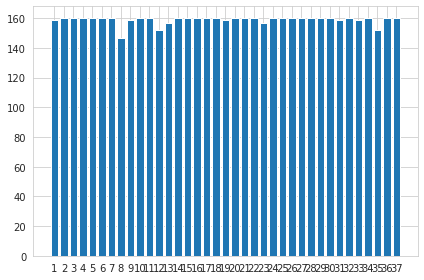

In [35]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [37]:
df.to_csv('/content/drive/MyDrive/#fastcampus/kfolds.csv', index=False)